<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Pamela! Muy buen trabajo con el desarrollo del ejercicio. Solamente te recomiendo verificar que estamos haciendo bien el redondeo de la transformación de mb a gb dado que por ejemplo para el ususario 1001 en el mes 10 esperamos que el cargo total sea 100.09 al pasarse por 8 gb y en tu caso tienes 0 gb. Con esto verificar el resultado de la segunda prueba de hipótesis. En esa prueba si rechazamos la prueba diríamos que no tenemos evidencia de decir que las medias entre los grupos son iguales. Te recuerdo que cualquier duda me la dejas en comentario para darle seguimiento. 
</div>

¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Objetivo:
Identificar, analizar y describir el comportamiento de los clientes en los planes de datos surf y ultimate con la finalidad de determinar qué plan de entre los dos, es el que genera más ingresos a la compañía. 

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

## Enriquecer los datos

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [7]:
users.duplicated().sum()

0

In [8]:
users['churn_date'].isna().sum()

466

Los resultados coinciden con la información que arroja .info() para 'churn_date'. Esto indica que a ese momento, 34 usuarios de la muestra, habían cancelado/dado de baja el servicio.

Para las columnas 'reg_date' y 'churn_date' los datos están como object y no son adecuados para el tipo de dato que describe la columna.Se sugiere reemplazar con tipo de dato de fecha. Modificar el nombre de la columna 'plan' a 'plan_name' para homolgar la información.

### Corregir los datos

A continuación, modificaremos los tipos de datos para las columnas 'reg_date'y 'churn_date' a datetime:

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [10]:
print(users['reg_date'].dtype)

datetime64[ns]


In [11]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [12]:
print(users['churn_date'].dtype)

datetime64[ns]


Se modificó el nombre de la columna 'plan' por 'plan_name' pues más adelante se hacía necesario para unir los dataframes.

In [13]:
users = users.rename(columns= {'plan':'plan_name'})
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buena conclusión, pero a manera de complementar el análisis qué podríamos decir de los registros que no tienen valores en la variable churn_date?
</div>

## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


 El tipo de dato de la columna 'call_date' debería cambiarse a tipo d dato de fecha.

### Corregir los datos

A continuación, convertiremos la columna 'call_date' a tipo datetime.

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
print(calls['call_date'].dtype)

datetime64[ns]


In [17]:
display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enriquecer los datos

In [18]:
calls['month'] = calls['call_date'].dt.month
display(calls.head())

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [21]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

 La columna 'message_date' se encuentra como tipo object, se sugiere cambio a tipo fecha.

### Corregir los datos

A continuación convertiremos la columna 'message_date' a tipo datetime.

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format ='%Y-%m-%d')
print(messages['message_date'].dtype)

datetime64[ns]


### Enriquecer los datos

In [23]:
messages['month'] = messages['message_date'].dt.month
display(messages.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [24]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La columna 'session_date' se encuentra como formato de dato tipo object, debe cambiarse a datetime.

### Corregir los datos

In [26]:
print(internet['session_date'].dtype)

object


In [27]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
print(internet['session_date'].dtype)

datetime64[ns]


In [28]:
display(internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [29]:
display(internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enriquecer los datos

In [30]:
internet['month'] = internet['session_date'].dt.month
display(internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, un paso que es muy importate realizar es verificar que no se tengan duplicados en nuestras bases de datos y en caso de tener duplicados entender si hace sentido su duplicación o solamente son errores de registro. En este sentido sería importante que para todas las bases de datos desarrolles un análisis de registros duplicados.
    
</div>

## Estudiar las condiciones de las tarifas

# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras.

 Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

In [31]:
#Imprime las condiciones de la tarifa y asegúrate de que te quedan claras.
plans[plans['plan_name'] == 'surf']

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


In [32]:
plans[plans['plan_name']=='ultimate'] 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [33]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_total = calls.groupby(['user_id','month'])['id'].count().reset_index()
calls_total.rename(columns = {'id':'total_calls'}, inplace = True)
display(calls_total.head())

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [34]:
#Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_duration = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
calls_duration.rename(columns = {'duration':'total_calls_duration'}, inplace=True)
display(calls_duration.head())

,user_id,month,total_calls_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [35]:
calls_info = calls_duration.merge(calls_total, on =['user_id','month'], how = 'outer')
calls_info.head()

,user_id,month,total_calls_duration,total_calls
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64


In [36]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_total = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_total.rename(columns ={'id':'total_messages'}, inplace = True)
display(messages_total.head())

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [37]:
calls_mess_info = calls_info.merge(messages_total, on =['user_id','month'], how = 'outer')
calls_mess_info.head()

,user_id,month,total_calls_duration,total_calls,total_messages
0,1000,12,116.83,16.0,11.0
1,1001,8,171.14,27.0,30.0
2,1001,9,297.69,49.0,44.0
3,1001,10,374.11,65.0,53.0
4,1001,11,404.59,64.0,36.0


In [38]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_month.rename(columns = {'mb_used':'total_mb_used'}, inplace = True)
display(internet_month.head(15))

,user_id,month,total_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y monthcalls_info = calls_mess_info.merge(internet_month, on= ['user_id', 'month'], how = 'outer')
calls_mess_int_info = calls_mess_info.merge(internet_month, on = ['user_id', 'month'], how = 'outer')
display(calls_mess_int_info.head())

,user_id,month,total_calls_duration,total_calls,total_messages,total_mb_used
0,1000,12,116.83,16.0,11.0,1901.47
1,1001,8,171.14,27.0,30.0,6919.15
2,1001,9,297.69,49.0,44.0,13314.82
3,1001,10,374.11,65.0,53.0,22330.49
4,1001,11,404.59,64.0,36.0,18504.30


In [40]:
# Añade la información de la tarifa
users_info = plans.merge(users, on =['plan_name'], how = 'outer')
display(users_info.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,user_id,first_name,last_name,age,city,reg_date,churn_date
0,50,15360,500,20,10,0.03,0.03,surf,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT
1,50,15360,500,20,10,0.03,0.03,surf,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT
2,50,15360,500,20,10,0.03,0.03,surf,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,NaT
3,50,15360,500,20,10,0.03,0.03,surf,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,NaT
4,50,15360,500,20,10,0.03,0.03,surf,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,NaT


In [41]:
megaline = calls_mess_int_info.merge(users_info, on = 'user_id', how = 'outer')
display(megaline.head())

,user_id,month,total_calls_duration,total_calls,total_messages,total_mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,first_name,last_name,age,city,reg_date,churn_date
0,1000,12.0,116.83,16.0,11.0,1901.47,1000,30720,3000,70,7,0.01,0.01,ultimate,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT
1,1001,8.0,171.14,27.0,30.0,6919.15,50,15360,500,20,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT
2,1001,9.0,297.69,49.0,44.0,13314.82,50,15360,500,20,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT
3,1001,10.0,374.11,65.0,53.0,22330.49,50,15360,500,20,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT
4,1001,11.0,404.59,64.0,36.0,18504.30,50,15360,500,20,10,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

##Calcula el ingreso mensual para cada usuario.

In [42]:
def mb_roundup (total_mb_used):
    round= np.ceil(total_mb_used/1024)
    return round

In [199]:
megaline['total_mb_billed'] = megaline['total_mb_used'].apply(mb_roundup)

In [200]:
megaline['gb_in_bill'] = megaline['total_mb_billed']- megaline['mb_per_month_included']
megaline['gb_in_bill'] = megaline.gb_in_bill.apply(lambda x: max(0,x))
megaline['gb_extra_charges'] = megaline['gb_in_bill']*megaline['usd_per_gb']

In [201]:
megaline['messages_in_bill'] = megaline['total_messages'] - megaline['messages_included']
megaline['messages_in_bill'] = megaline.messages_in_bill.apply(lambda x: max(0, x))
megaline['messages_extra_charges'] = megaline['messages_in_bill']*megaline['usd_per_message']

In [202]:
megaline['total_to_pay'] = megaline['messages_extra_charges'] + megaline['calls_extra_charges'] + megaline['gb_extra_charges'] + megaline['usd_monthly_pay']
megaline.head()

,user_id,month,total_calls_duration,total_calls,total_messages,total_mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,reg_date,churn_date,total_mb_billed,gb_in_bill,gb_extra_charges,messages_in_bill,messages_extra_charges,calls_in_bill,calls_extra_charges,total_to_pay
0,1000,12.0,116.83,16.0,11.0,1901.47,1000,30720,3000,70,...,2018-12-24,NaT,2.0,0,0,0.0,0.00,0.0,0.0,70.00
1,1001,8.0,171.14,27.0,30.0,6919.15,50,15360,500,20,...,2018-08-13,NaT,7.0,0,0,0.0,0.00,0.0,0.0,20.00
2,1001,9.0,297.69,49.0,44.0,13314.82,50,15360,500,20,...,2018-08-13,NaT,14.0,0,0,0.0,0.00,0.0,0.0,20.00
3,1001,10.0,374.11,65.0,53.0,22330.49,50,15360,500,20,...,2018-08-13,NaT,22.0,0,0,3.0,0.09,0.0,0.0,20.09
4,1001,11.0,404.59,64.0,36.0,18504.30,50,15360,500,20,...,2018-08-13,NaT,19.0,0,0,0.0,0.00,0.0,0.0,20.00


## Estudia el comportamiento de usuario

### Llamadas

In [48]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

In [173]:
surf_monthly_calls_mean = megaline[megaline['plan_name'] == 'surf'].groupby('month')['total_calls_duration'].mean()
ultimate_monthly_calls_mean = megaline[megaline['plan_name'] == 'ultimate'].groupby('month')['total_calls_duration'].mean()
mean_monthly_calls = pd.concat([surf_monthly_calls_mean, ultimate_monthly_calls_mean], axis = 'columns')

<AxesSubplot:title={'center':'Calls mean duration by month'}, xlabel='month'>

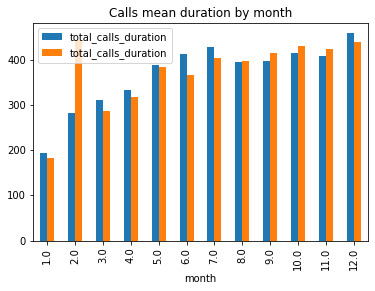

In [174]:
mean_monthly_calls.plot(kind = 'bar',
                              title = 'Calls mean duration by month'
                             )

In [175]:
surf_monthly_messages_mean = megaline[megaline['plan_name'] == 'surf'].groupby('month')['total_messages'].mean()
ultimate_monthly_messages_mean = megaline[megaline['plan_name'] == 'ultimate'].groupby('month')['total_messages'].mean()
mean_monthly_messages = pd.concat([surf_monthly_messages_mean, ultimate_monthly_messages_mean], axis = 'columns')

<AxesSubplot:title={'center':'Mean messages used by month'}, xlabel='month'>

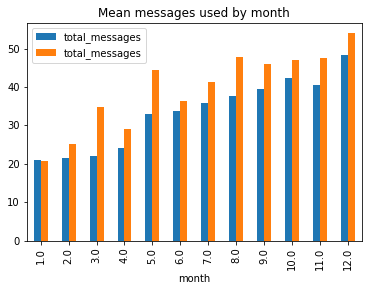

In [181]:
mean_monthly_messages.plot(kind = 'bar',
                              title = 'Mean messages used by month'
                             )

In [179]:
surf_monthly_mb_mean = megaline[megaline['plan_name'] == 'surf'].groupby('month')['total_mb_billed'].mean()
ultimate_monthly_mb_mean = megaline[megaline['plan_name'] == 'ultimate'].groupby('month')['total_mb_billed'].mean()
mean_monthly_mb = pd.concat([surf_monthly_mb_mean, ultimate_monthly_mb_mean], axis = 'columns')

<AxesSubplot:title={'center':'MB mean usage by month'}, xlabel='month'>

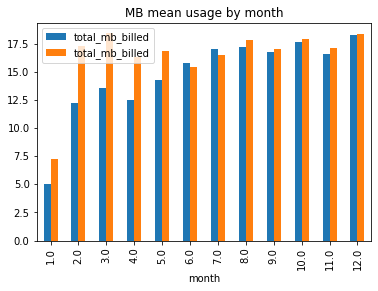

In [180]:
mean_monthly_mb.plot(kind = 'bar',
                              title = 'MB mean usage by month'
                             )

# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

In [59]:
# Calcula la media y la varianza de la duración mensual de llamadas.

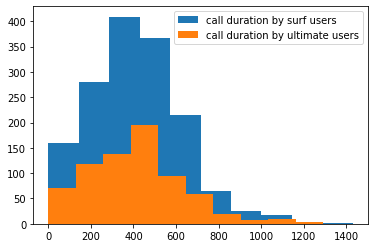

In [160]:
call_surf = megaline[megaline['plan_name'] == 'surf']['total_calls_duration']
call_ultimate = megaline[megaline['plan_name'] == 'ultimate']['total_calls_duration']
plt.hist(call_surf, label = 'call duration by surf users')
plt.hist(call_ultimate, label = 'call duration by ultimate users')
plt.legend(loc='upper right')
plt.show()

In [133]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.

<AxesSubplot:xlabel='plan_name', ylabel='total_calls_duration'>

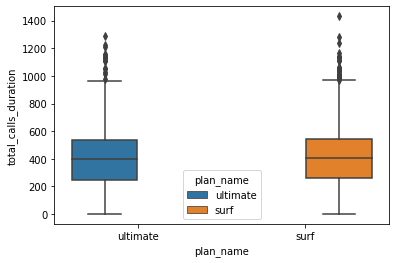

In [134]:
sns.boxplot(x = megaline['plan_name'], y= megaline['total_calls_duration'], hue = 'plan_name', data = megaline)

En el diagrama nuestra cajita representa el 50% de los valores de la muestra, lo que quiere decir a su vez, que hay un 25% por debajo - el primer cuartil (debajo, o a la izquierda de la caja); y otro 25% sobre la caja (a la derecha). La media como vemos, se percibe justo por encima de 400, lo que parece corresponder a las medias de llamadas de los usuarios de surf y ultimate; y a la media general de duración de  llamadas de 411.49 obtenida con el método describe(). El primer cuartil (25%) inicia en 258 y termina en 404 (50%), nuestra cajita termina en 543, el tercer cuartil.El valor máximo de la distribución es 1431, lo que quiere decir que un usuario usó esa cantidad de minutos en un mes.   

>>Me confundí un poco interpretando la indicación sobre la interpretación de la 'distribución de la duración mensual de llamadas'<<

Este gráfico nos permite observar las diferencias en el consumo de los usuarios cada mes. Podemos apreciar especialmente que para febrero(2), los usuarios de ultimate realizan muchas más llamadas  que los de surf.

<AxesSubplot:xlabel='month', ylabel='total_calls_duration'>

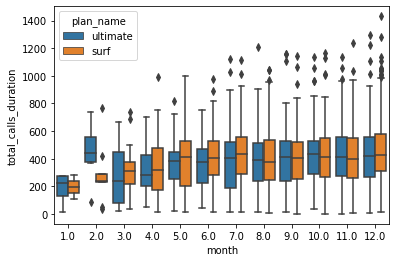

In [132]:
sns.boxplot(x= megaline['month'], y = megaline['total_calls_duration'], hue = 'plan_name', data = megaline )

In [136]:
megaline.describe()

,user_id,month,total_calls_duration,total_calls,total_messages,total_mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_minute,age,total_mb_billed,gb_in_bill,gb_extra_charges,messages_in_bill,messages_extra_charges,calls_in_bill,calls_extra_charges,total_to_pay
count,2303.000000,2293.000000,2258.000000,2258.000000,1806.000000,2277.000000,2303.00000,2303.000000,2303.000000,2303.000000,...,2303.000000,2303.000000,2277.000000,2303.0,2303.0,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,9.172700,411.492586,60.998671,42.110188,16882.197501,348.65393,20188.762484,1285.931394,35.718628,...,0.023713,45.420756,16.989021,0.0,0.0,4.789839,0.143695,33.347599,1.000428,36.862751
std,143.044136,2.496386,219.290453,31.770869,33.122931,7869.784848,441.14801,7132.666777,1160.915817,23.218316,...,0.009287,16.774962,7.693683,0.0,0.0,16.417795,0.492534,93.752199,2.812566,22.628851
min,1000.000000,1.000000,0.000000,1.000000,1.000000,92.310000,50.00000,15360.000000,500.000000,20.000000,...,0.010000,18.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,258.075000,39.000000,17.000000,12347.720000,50.00000,15360.000000,500.000000,20.000000,...,0.010000,30.000000,13.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,20.000000
50%,1245.000000,10.000000,404.270000,60.000000,34.000000,16873.740000,50.00000,15360.000000,500.000000,20.000000,...,0.030000,46.000000,17.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,21.440000
75%,1368.000000,11.000000,543.335000,80.000000,59.000000,21041.520000,1000.00000,30720.000000,3000.000000,70.000000,...,0.030000,61.000000,21.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,70.000000
max,1499.000000,12.000000,1431.220000,205.000000,266.000000,70931.590000,1000.00000,30720.000000,3000.000000,70.000000,...,0.030000,75.000000,70.000000,0.0,0.0,216.000000,6.480000,931.220000,27.936600,70.000000


Para ambos planes, la duración media de las llamadas al mes es bastante similiar. En el caso de surf, su promedio es de 412 minutos mientras que para ultimate es de 410 minutos, siendo la media general de 411.492. Paradójicamente, los usuarios de surf suelen requerir un poco más de minutos de llamadas que los usuarios de ultimate, a pesar de que estos tienen más minutos  a su disposición. Esto nos sugiere que el comportamiento de los usuarios no necesariamente está ligado a la cantidad de minutos que tienen disponibles, es decir,su comportamiento no estpa dictado por las características de su  plan.

### Mensajes

In [157]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

La cantidad de envío de mensajes para los usuarios en ambos planes es muy similar, esto, pese a que los usuarios de surf tienen unicamente 50 sms disponibles, mientras que los de ultimate disponen de 1000.

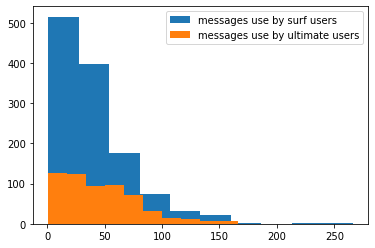

In [156]:
mess_surf = megaline[megaline['plan_name'] == 'surf']['total_messages']
mess_ultimate = megaline[megaline['plan_name'] == 'ultimate']['total_messages']
plt.hist(mess_surf, label = 'messages use by surf users')
plt.hist(mess_ultimate, label = 'messages use by ultimate users')
plt.legend(loc='upper right')
plt.show()

In [158]:
mess_surf.describe()

count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: total_messages, dtype: float64

In [159]:
mess_ultimate.describe()

count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: total_messages, dtype: float64

### Internet

In [107]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

Los usuarios de surf usan un mínimo de 92.31 mb y un máximo de 70931 mb, siendo la media de uso 16717.702 mb; por su parte los usuarios de ultimate utilizan un mínimo de 233.170 mb y un máximo de 46595.330 mb con una media de 1728.642 mb.

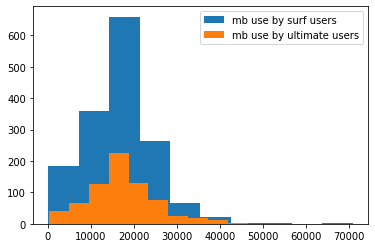

In [146]:
mb_surf = megaline[megaline['plan_name'] == 'surf']['total_mb_used']
mb_ultimate = megaline[megaline['plan_name'] == 'ultimate']['total_mb_used']
plt.hist(mb_surf, label = 'mb use by surf users')
plt.hist(mb_ultimate, label = 'mb use by ultimate users')
plt.legend(loc='upper right')
plt.show()

In [155]:
mb_surf.describe()

count     1558.000000
mean     16717.702137
std       7884.682983
min         92.310000
25%      12187.955000
50%      16923.830000
75%      21039.860000
max      70931.590000
Name: total_mb_used, dtype: float64

In [153]:
mb_ultimate.describe()

count      719.000000
mean     17238.642253
std       7831.018323
min        233.170000
25%      12671.130000
50%      16863.450000
75%      21025.155000
max      46595.330000
Name: total_mb_used, dtype: float64

El histograma nos pudiera sugerir que quizá los usuarios en ultimate realizan su decisión de compra basados en otras características que no están asociadas al plan, o por lo menos no a la cantidad de mb que les ofrece, o no conozcan su cantidad de uso promedio mensual.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Ingreso

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, es muy buena prática eliminar valores atipicos que puedan sesgar nuestros resultados. En este caso elaminar estos valores puedes ser útiles para tener una mejor respuesta de las pruebas de hipóstesis sobre si son iguales o diferentes los ingresos promedios de los usuarios de ambos planes y de los ingresos promedio de los usuarios del área NY-NJ.

</div>

Para el caso de los usuarios de surf, podemos observar que el revenue mínimo es el esperado de 20.00 usd que corresponde al costo del plan, y llega hasta un máximo de 50.18 usd que pagan los ususarios que reciben cargos extra por exceder las características de su plan. La media que paga los usuarios en surf es de 21.66 usd.

In [71]:
surf_revenue = megaline.query('plan_name == "surf"')['total_to_pay']

In [122]:
surf_revenue.describe()

count    1579.000000
mean       21.668724
std         3.491797
min        20.000000
25%        20.000000
50%        20.000000
75%        21.796550
max        50.186600
Name: total_to_pay, dtype: float64

In [137]:
print(surf_revenue.var())

12.192648749949935


In [184]:
print(surf_revenue.sum())

34214.91559999999


En cuanto a ultimate, el valor mínimo y máximo que pagan sus usuarios es de 70.00 usd es decir que los usuarios no exceden las condiciones de su plan.

In [72]:
ultimate_revenue = megaline.query('plan_name == "ultimate"')['total_to_pay']

In [123]:
ultimate_revenue.describe()

count    724.0
mean      70.0
std        0.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max       70.0
Name: total_to_pay, dtype: float64

In [124]:
print(ultimate_revenue.var())

0.0


In [182]:
print(ultimate_revenue.sum())

50680.0


En una primera impresión podemos observar que las varianzas de ultimate y surf no son iguales, rechazando la hipótesis nula.

## Prueba las hipótesis estadísticas

Para probar que los revenue promedio procedentes de los usuarios de los planes ultimate y surf son diferentes, las hipótesis se formulan de la siguiente manera en las pruebas de hipótesis:
La hipótesis nula, expresada como H0, sugiere que las varianzas de las muestras son iguales, por su parte la hipótesis alternativa H1 sugiere que las varianzas de las muestras no son iguales.

In [79]:
# Prueba las hipótesis

In [80]:
alpha = 0.05
hypo_1 = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var= False )
print(hypo_1.pvalue)
if hypo_1.pvalue > alpha:
     print('p value is bigger than alpha, this suggests that the null hypotesis is true and we can not reject it. Variances are the same.')
    
else:
    print('p value is smaller than alpha, therefore, we reject the null hypotesis. This means that the variance of surf and ultimate are not the same.')

0.0
p value is smaller than alpha, therefore, we reject the null hypotesis. This means that the variance of surf and ultimate are not the same.


No tenemos evidencia para respaldar H0, o en este caso, evidencia que respalde la hipótesis de que: el 'revenue' promedio sea igual entre los usuarios de surf y los usuarios de ultimate.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [212]:
mega_users= megaline.merge(users, on =['user_id'], how = 'outer')
mega_users.tail(60)

,user_id,month,total_calls_duration,total_calls,total_messages,total_mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,calls_in_bill,calls_extra_charges,total_to_pay,first_name_y,last_name_y,age_y,city_y,reg_date_y,plan_name_y,churn_date_y
2243,1496,9.0,389.94,52.0,21.0,16389.27,50,15360,500,20,...,0.0,0.0,20.00,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
2244,1496,10.0,301.16,46.0,18.0,14287.36,50,15360,500,20,...,0.0,0.0,20.00,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
2245,1496,11.0,291.88,39.0,13.0,8547.36,50,15360,500,20,...,0.0,0.0,20.00,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
2246,1496,12.0,278.61,40.0,11.0,16438.99,50,15360,500,20,...,0.0,0.0,20.00,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
2247,1497,12.0,276.53,54.0,50.0,11106.55,1000,30720,3000,70,...,0.0,0.0,70.00,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
2248,1498,2.0,231.87,37.0,NaN,19822.04,50,15360,500,20,...,0.0,0.0,20.00,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
2249,1498,3.0,247.72,37.0,NaN,19744.34,50,15360,500,20,...,0.0,0.0,20.00,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
2250,1498,4.0,344.18,47.0,NaN,19878.86,50,15360,500,20,...,0.0,0.0,20.00,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
2251,1498,5.0,275.13,35.0,NaN,22462.17,50,15360,500,20,...,0.0,0.0,20.00,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
2252,1498,6.0,225.57,37.0,NaN,14807.18,50,15360,500,20,...,0.0,0.0,20.00,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


In [222]:
ny_ny = ['New York-Newark-Jersey City, NY-NJ-PA MSA']

ny_nj_rev = mega_users[mega_users['city_y'] == 'ny-nj']['total_to_pay']
other_cities_rev =  mega_users[mega_users['city_y'] != 'ny-nj']['total_to_pay']

alpha = 0.05
hypo_2 = st.ttest_ind(ny_nj_rev, other_cities_rev, equal_var= False )
print(hypo_2.pvalue)
if hypo_2.pvalue > alpha:
     print('p value is bigger than alpha, this suggests that the null hypotesis is true and we can not reject it. Variances are the same.')
    
else:
    print('p value is smaller than alpha, therefore, we reject the null hypotesis. This means that the variance of ny_nj and other_cities_users  are not the same.')

nan
p value is smaller than alpha, therefore, we reject the null hypotesis. This means that the variance of ny_nj and other_cities_users  are not the same.


In [220]:
mega_users['city_y'].isna().sum()

0

In [221]:
mega_users['total_to_pay'].isna().sum()

0

>>Hola, ya le di muchas vueltas y no he entendido qué es lo que pasa en este punto; imagino que el trabajo tiene mucho que mejorar pero les pido me tengan poquito de paciencia pues soy nueva en esto. Muchas Gracias.<<

In [216]:
# Prueba las hipótesis

#ny_nj = ['New York-Newark-Jersey City, NY-NJ-PA MSA']
#ny_nj_users = mega_users[mega_users['city_y'].isin(ny_nj)][['city_y', 'total_to_pay']]
#print(ny_nj_users.head())

In [218]:
#other_cities_users = mega_users[~mega_users['city_y'].isin(ny_nj)][['city_y', 'total_to_pay']]
#print(other_cities_users.head())

## Conclusión general

En cuanto al procesamiento de datos los más importante a destacar son los cambios que se realizaron a los datos de fecha que se convirtieron a formato datetime, que nos permitiría posteriormente enriquecer los datos con las columnas correspondientes a los meses de llamadas, mensajes y mb.
De manera general puede concluirse que el comportamiento de los usuarios tanto de ultimate como de surf no está determinado por los datos que tienen a su disposición. Esto puede observarse con mayor claridad en cuanto a la cantidad de mb/gb consumidos, pues los usuarios de surf superan el uso promedio mensual de los usuarios de ultimate, pese a que estos últimos tienen a su disposición el doble de gb. La media de llamadas y mensajes son similares en usuarios de ambos planes. Sin embargo...

>>no redacté mayores conclusiones debido a que todavía no tengo claros los resultados de las pruebas de hipótesis<<